<a href="https://colab.research.google.com/github/Unholy-Applepie/Bankruptcy-Prediction/blob/main/Bankruptcy_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings('ignore')

# Missing Data

In [ ]:
data = pd.read_csv('/data.csv')
data.shape
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
missing_data = data.isna()
missing_data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_data = data.isna().any()
missing_data

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
                                                            ...  
 Liability to Equity                                        False
 Degree of Financial Leverage (DFL)                         False
 Interest Coverage Ratio (Interest expense to EBIT)         False
 Net Income Flag                                            False
 Equity to Liability                                        False
Length: 96, dtype: bool

In [ ]:
missing_data = data.isna().any().any()
missing_data

False

# Checking data distribution/skewness

<Axes: xlabel='Bankrupt?', ylabel='count'>

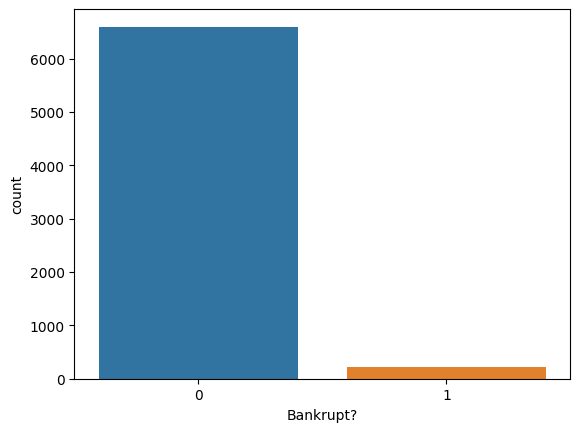

In [ ]:
sns.countplot(x=data['Bankrupt?'])

In [ ]:
print(data['Bankrupt?'].value_counts())
print("")
not_bankrupt_percent = data['Bankrupt?'].value_counts()[0]/len(data)*100
bankrupt_percent = data['Bankrupt?'].value_counts()[1]/len(data)*100
print(f'Not Bankrupt: {round(not_bankrupt_percent , 2)} %')
print(f'Bankrupt: {round(bankrupt_percent , 2)} %')

0    6599
1     220
Name: Bankrupt?, dtype: int64

Not Bankrupt: 96.77 %
Bankrupt: 3.23 %


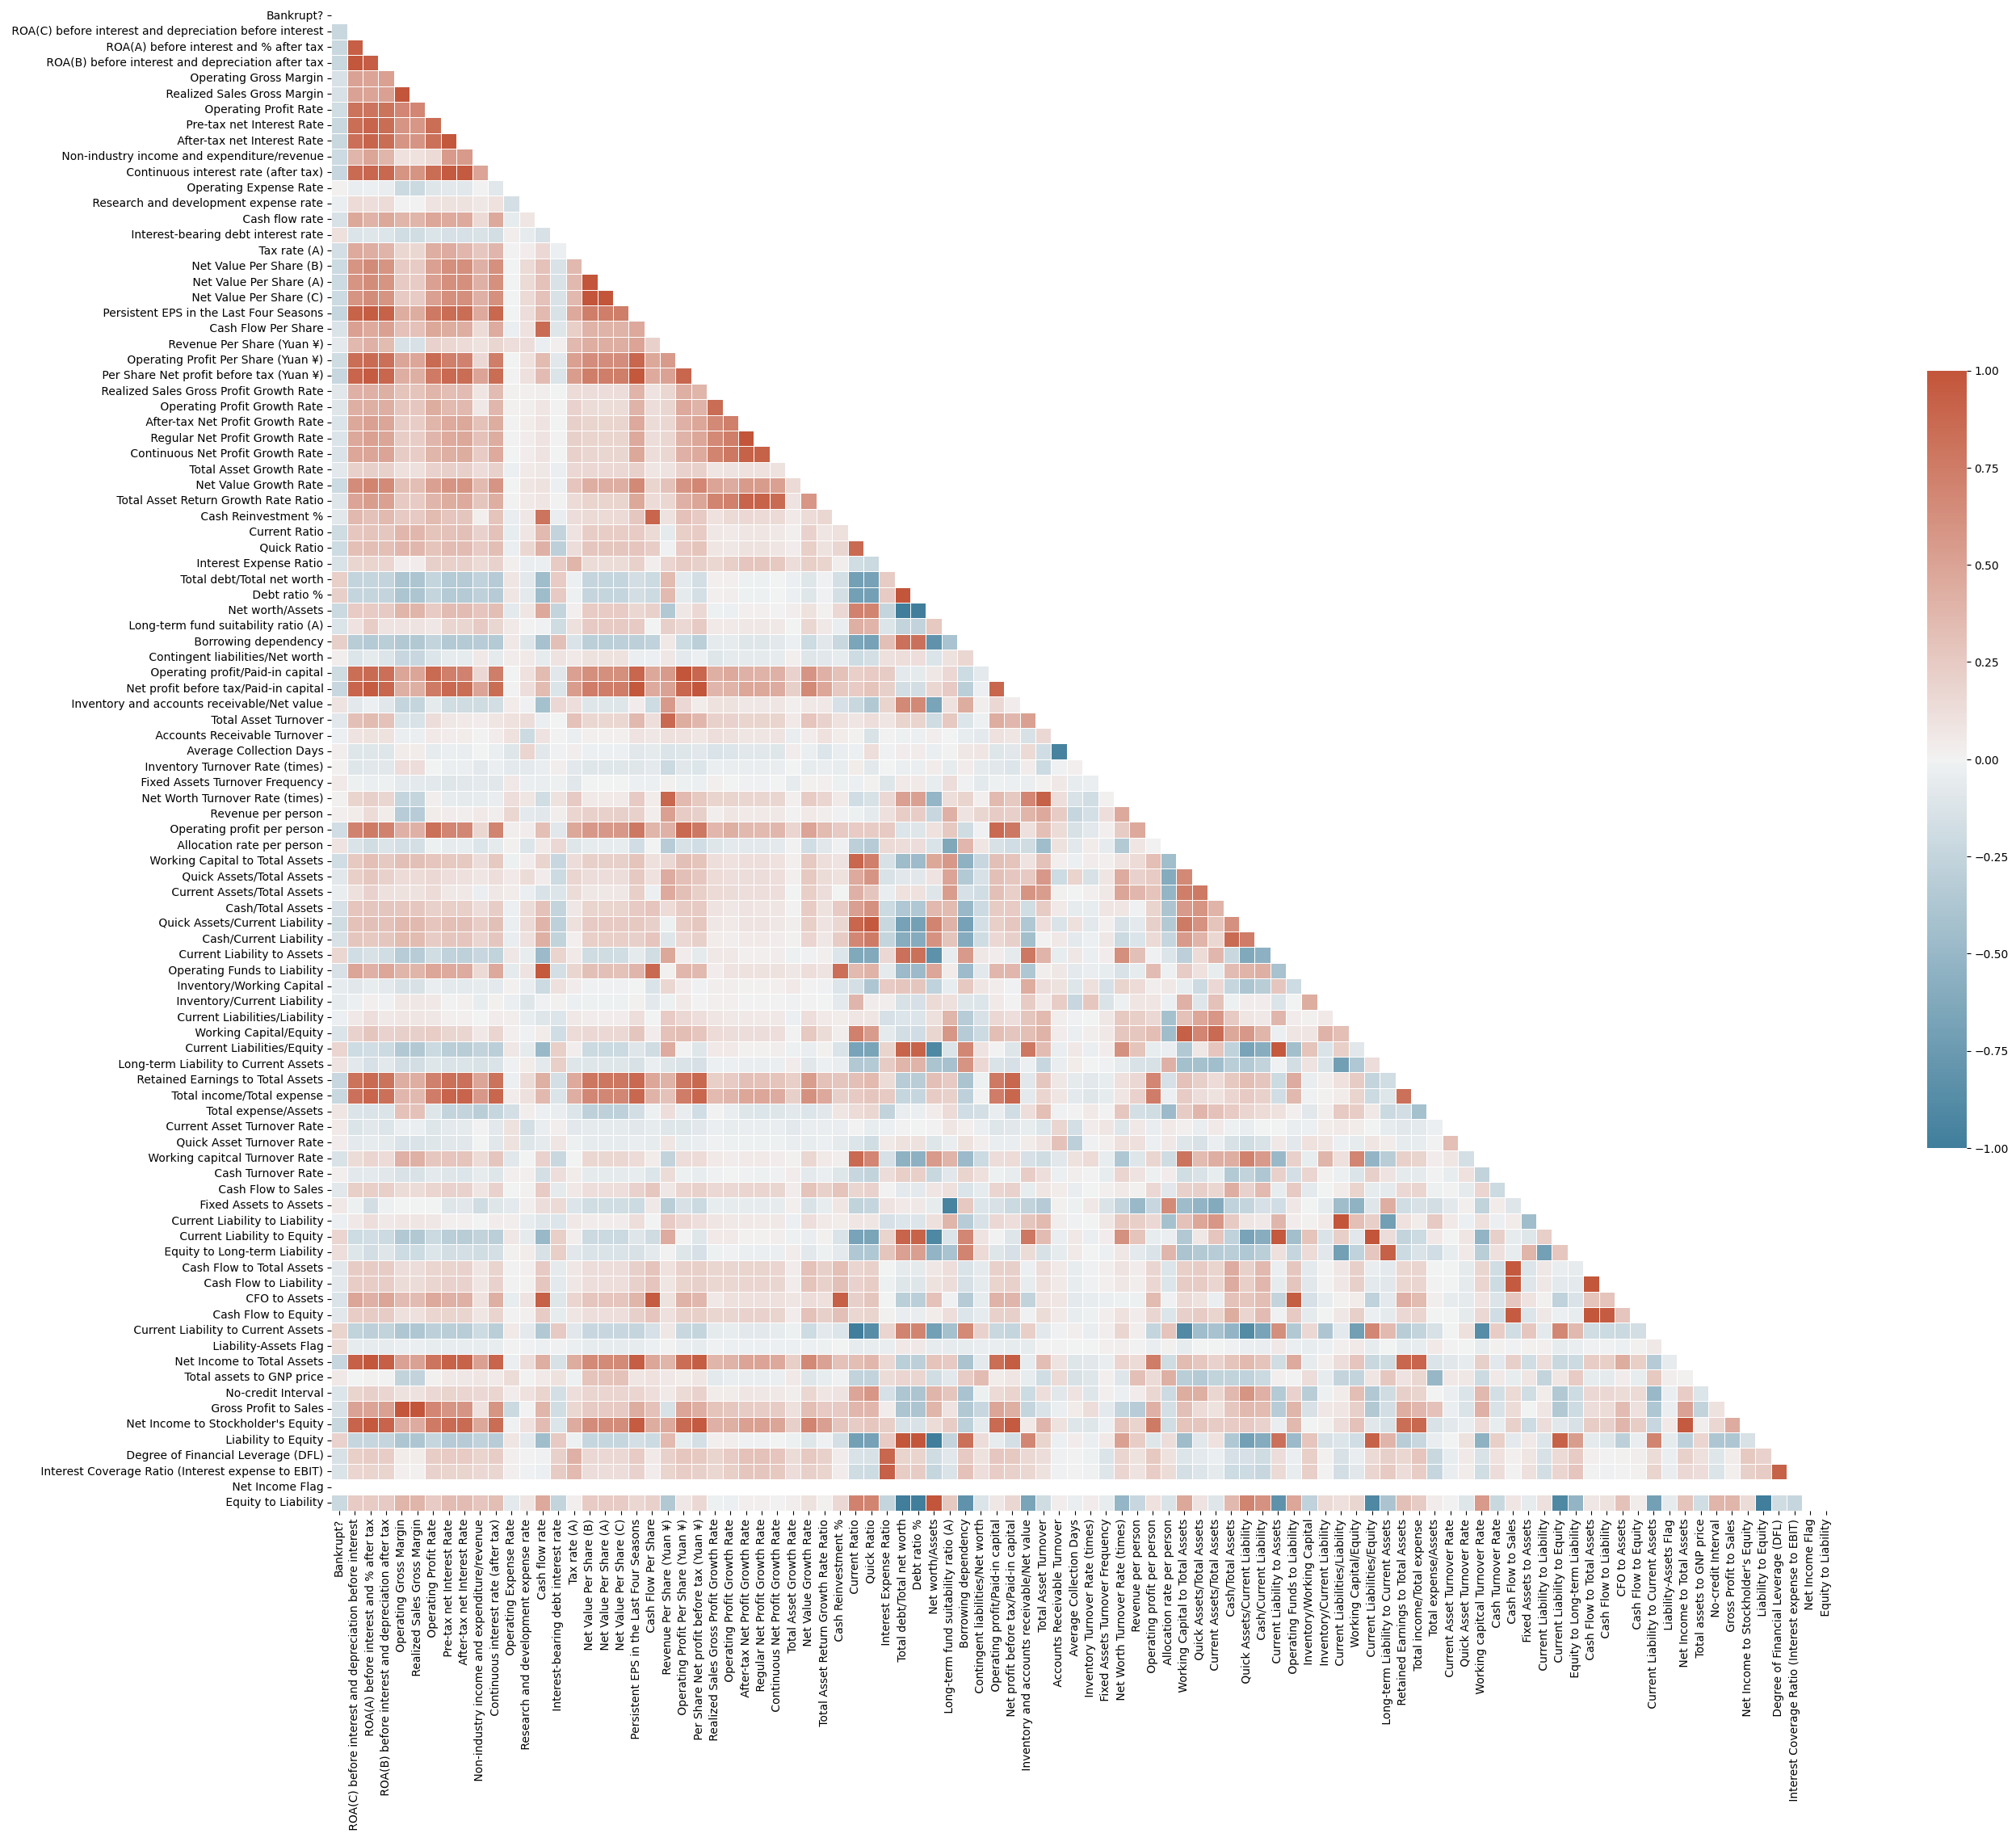

In [ ]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

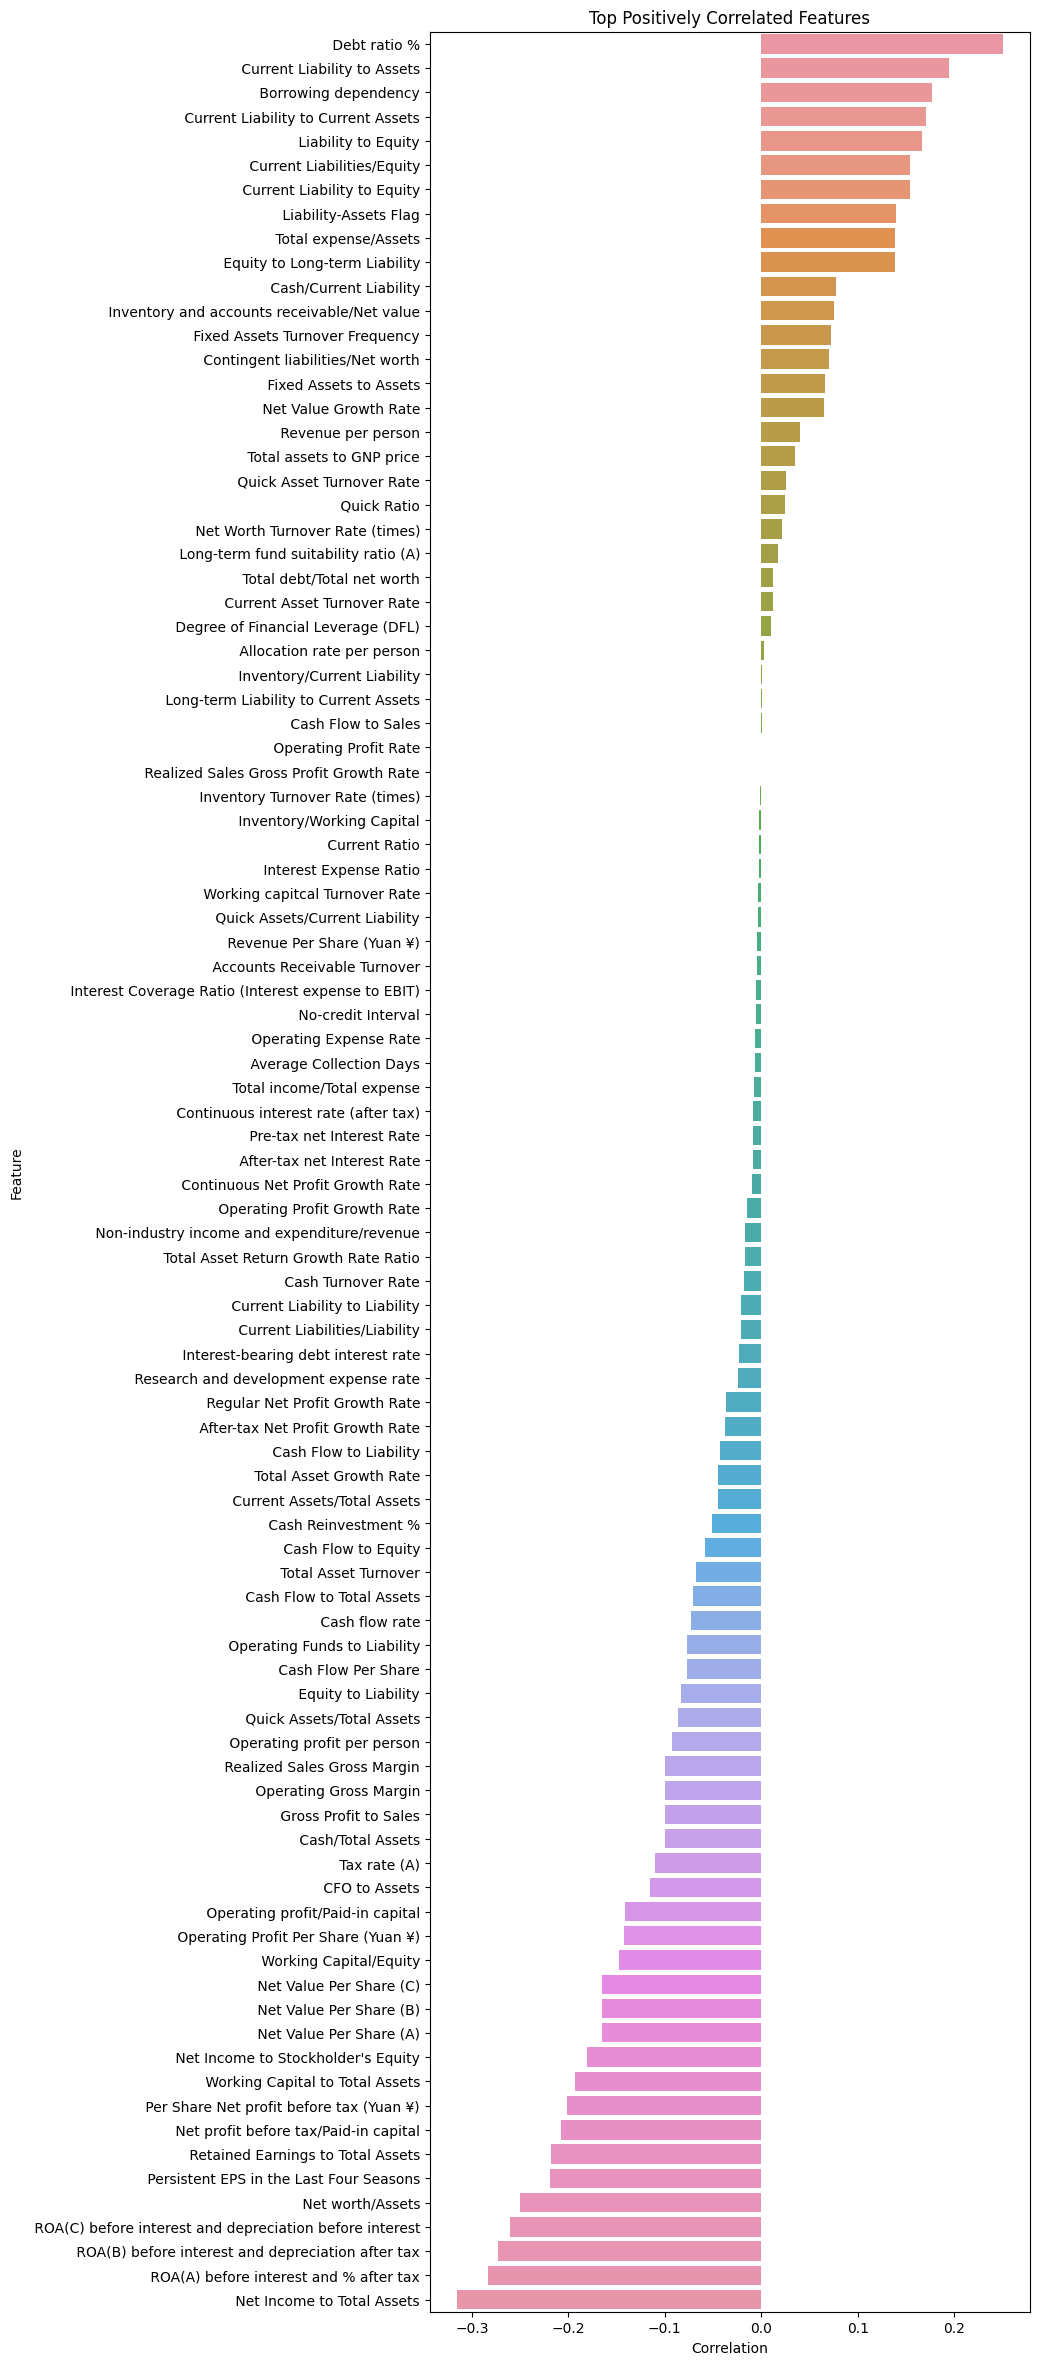

In [ ]:


# Create a larger figure
plt.figure(figsize=(12, 12))

# Calculate the correlation of each feature with the target variable
correlation_with_target = data.corr()['Bankrupt?'].sort_values(ascending=False)
# Remove the target variable itself
correlation_with_target = correlation_with_target.drop('Bankrupt?')

# Filter out features with NaN values
correlation_with_target = correlation_with_target.dropna()

# Plot top positively correlated features with more space
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, orient='h')
plt.title("Top Positively Correlated Features")
plt.xlabel("Correlation")
plt.ylabel("Feature")

# Add space between the bars
plt.subplots_adjust(left=0.4, right=0.9, top=1.95, bottom=0.05)

plt.show()


In [ ]:


# Calculate the correlation of each feature with the target variable
correlation_with_target = data.corr()['Bankrupt?'].sort_values(ascending=False)

# Remove the target variable itself
correlation_with_target = correlation_with_target.drop('Bankrupt?')

# Filter out features with NaN values
correlation_with_target = correlation_with_target.dropna()

# Get the top 5 positively correlated features
top_positively_correlated = correlation_with_target.head(5)

# Get the bottom 5 negatively correlated features
bottom_negatively_correlated = correlation_with_target.tail(5)

# Combine the top and bottom 5
selected_features = top_positively_correlated.append(bottom_negatively_correlated)

# Print the selected features
print("Top and Bottom Highly Correlated Features (without NaN values):")
print(selected_features)


Top and Bottom Highly Correlated Features (without NaN values):
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Net worth/Assets                                          -0.250161
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64


In [ ]:
selected_features_names = selected_features.index.tolist()
selected_features_names

[' Debt ratio %',
 ' Current Liability to Assets',
 ' Borrowing dependency',
 ' Current Liability to Current Assets',
 ' Liability to Equity',
 ' Net worth/Assets',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(A) before interest and % after tax',
 ' Net Income to Total Assets']

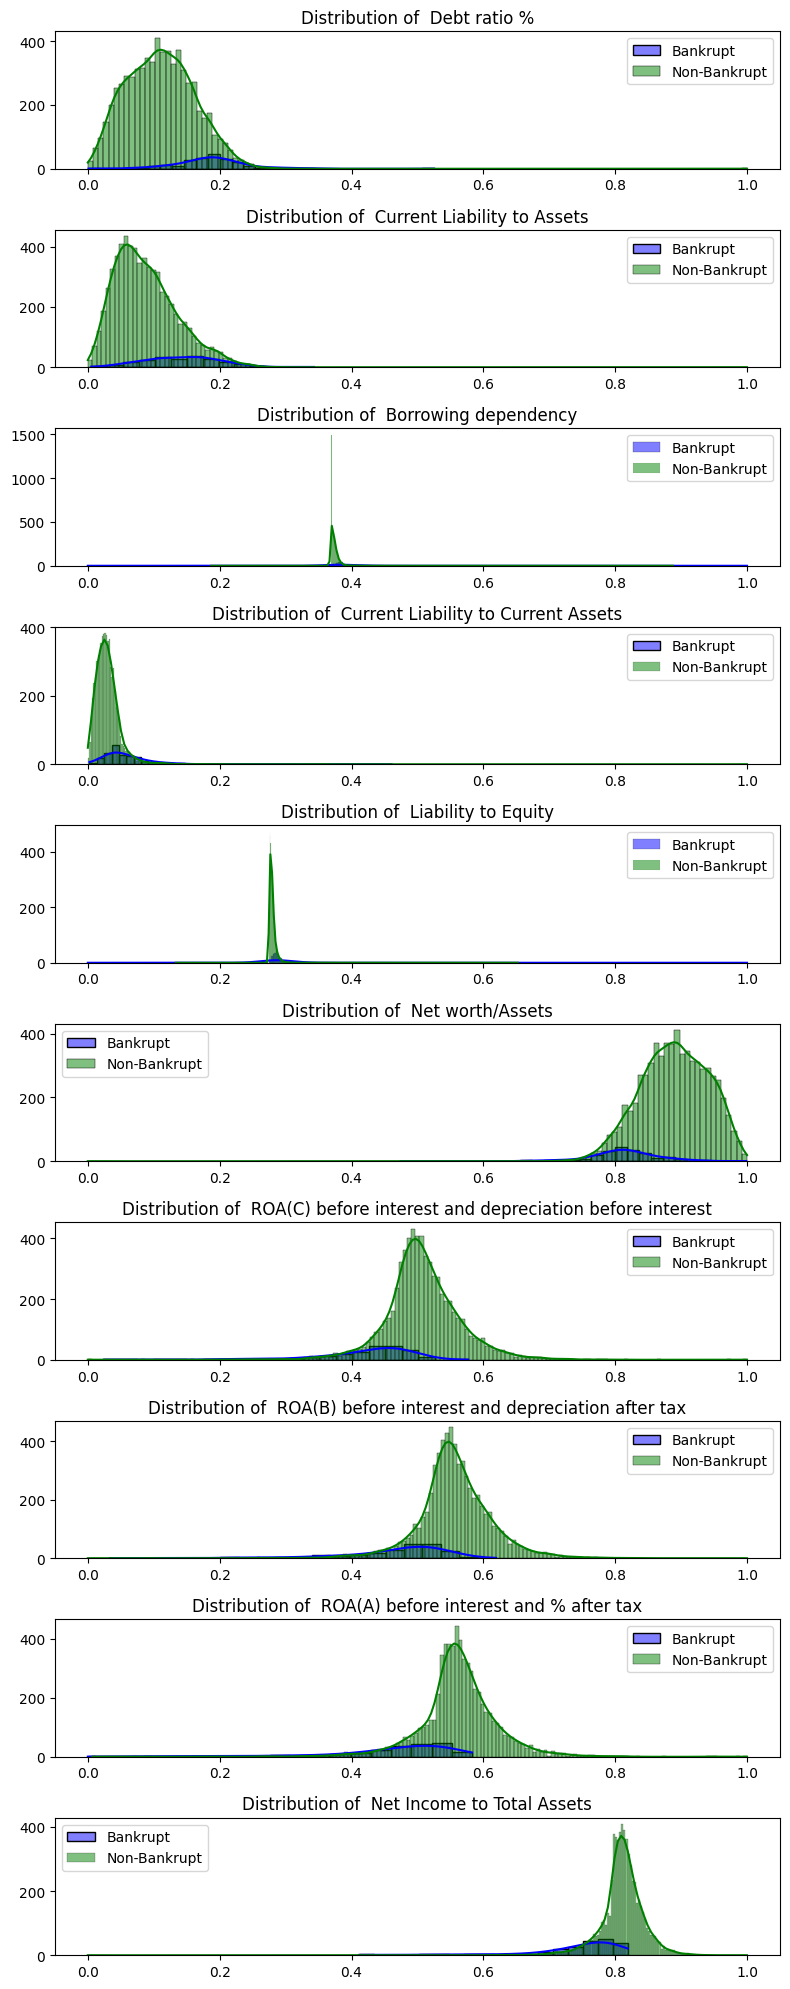

In [ ]:
# Select the data for bankrupt and non-bankrupt companies
bankrupt_data = data[data['Bankrupt?'] == 1]
non_bankrupt_data = data[data['Bankrupt?'] == 0]

highly_correlated_features = selected_features_names

# Set the number of features to display
num_features_to_display = len(highly_correlated_features)

# Create subplots with enough space
fig, axes = plt.subplots(nrows=num_features_to_display, ncols=1, figsize=(8, 2 * num_features_to_display))

for i, feature in enumerate(highly_correlated_features):
    # Plot histograms for each feature
    ax = axes[i]
    sns.histplot(bankrupt_data[feature], kde=True, label='Bankrupt', color='blue', ax=ax)
    sns.histplot(non_bankrupt_data[feature], kde=True, label='Non-Bankrupt', color='green', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend()

plt.tight_layout()
plt.show()


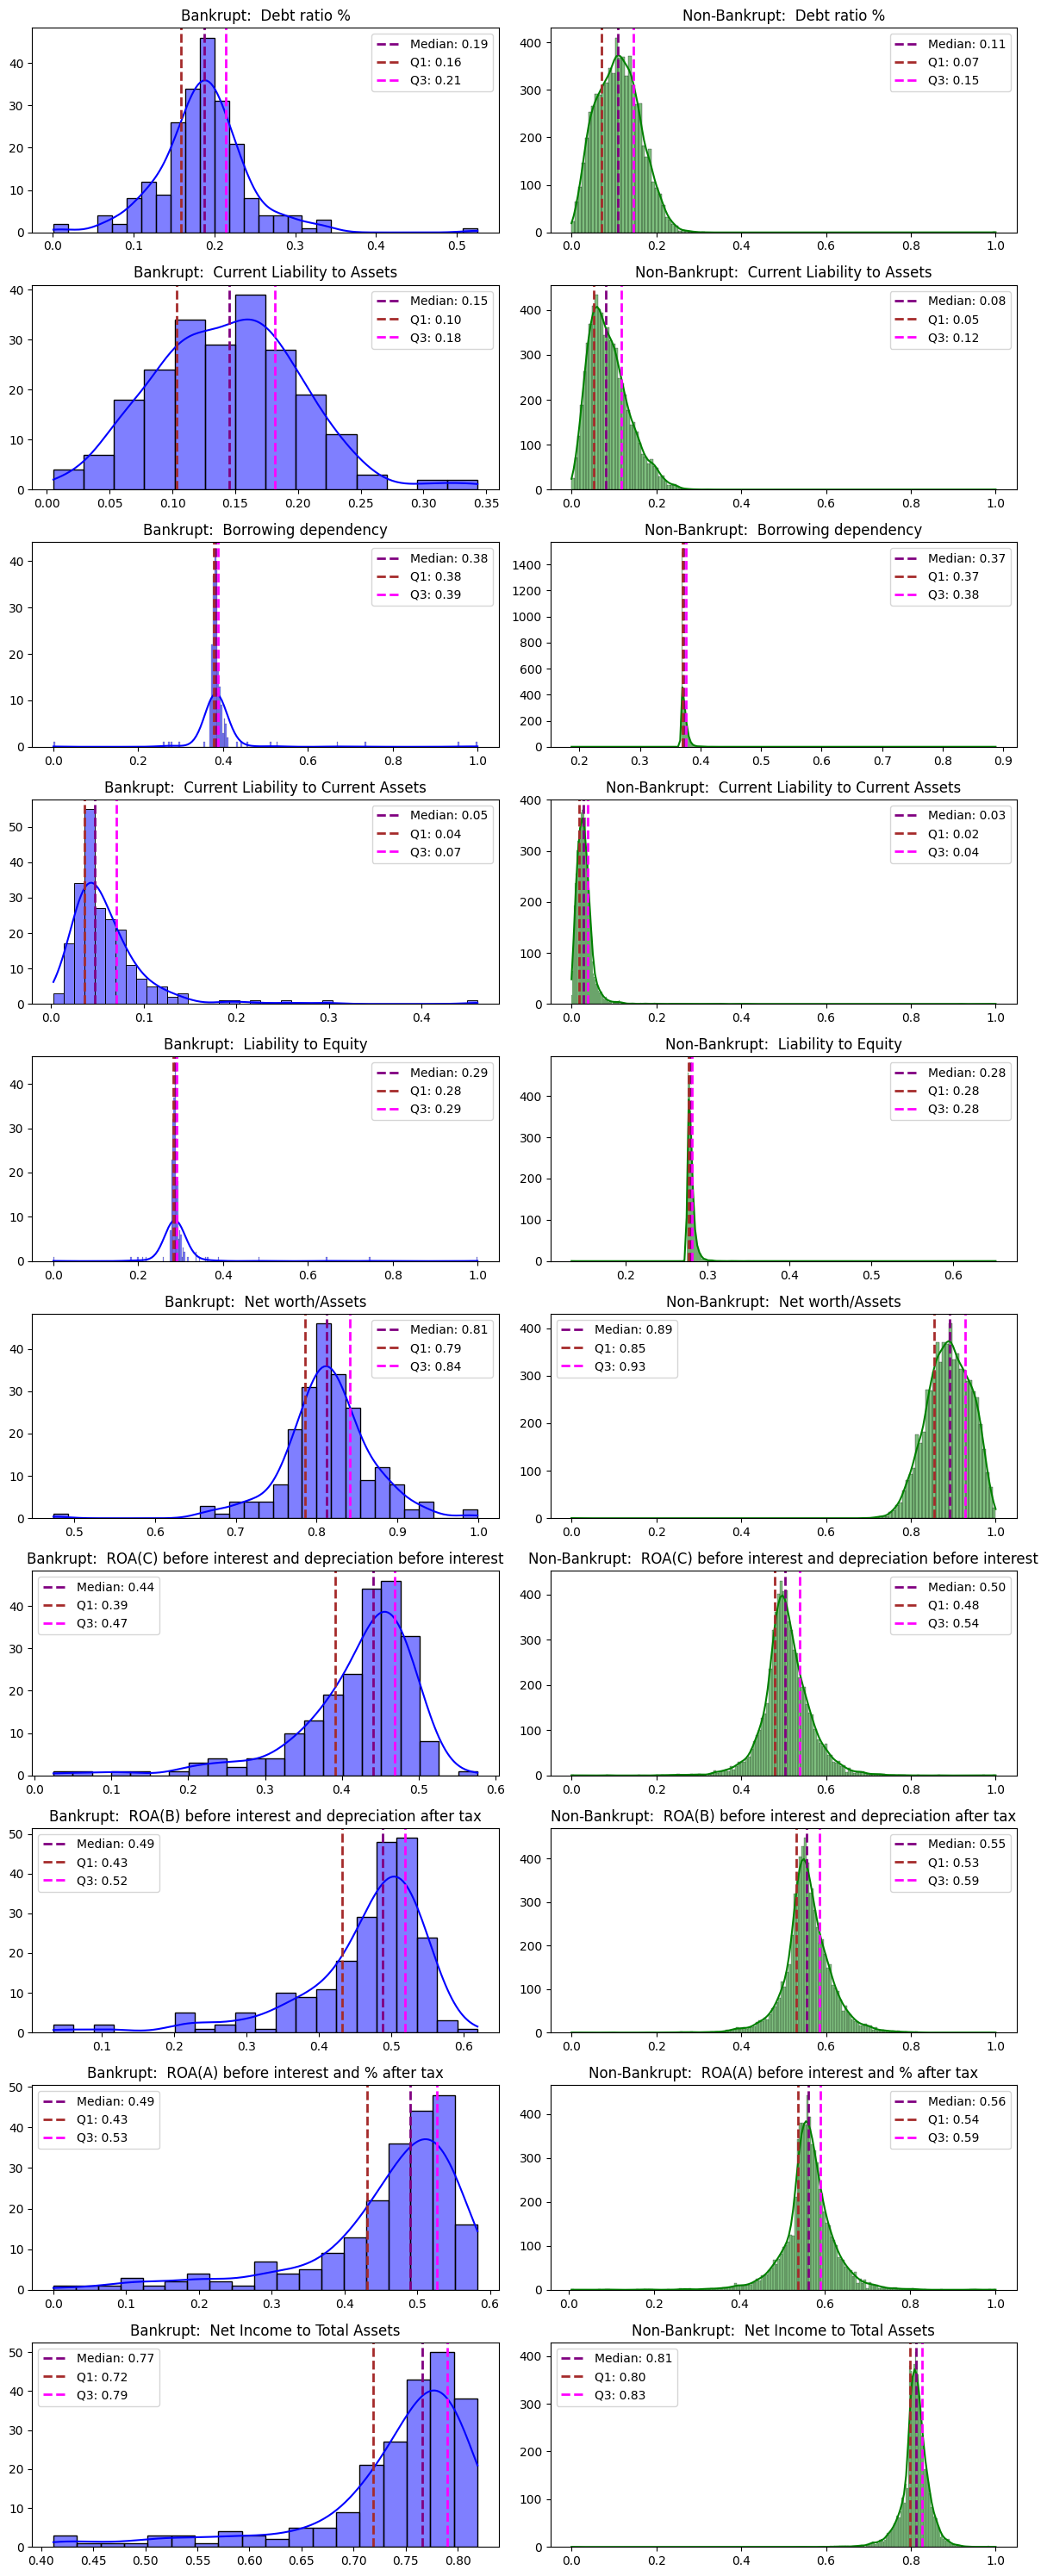

In [ ]:

# Create subplots
num_features = len(highly_correlated_features)
fig, axes = plt.subplots(num_features, 2, figsize=(12, 3 * num_features))

for i, feature in enumerate(highly_correlated_features):
    # Create histograms for bankrupt companies
    sns.histplot(data[feature][data['Bankrupt?'] == 1], kde=True, color='blue', ax=axes[i][0])
    axes[i][0].set_title(f'Bankrupt: {feature}')

    # Calculate statistics for bankrupt companies
    mean_bankrupt = data[feature][data['Bankrupt?'] == 1].mean()
    median_bankrupt = data[feature][data['Bankrupt?'] == 1].median()
    mode_bankrupt = data[feature][data['Bankrupt?'] == 1].mode().values[0]
    quartiles_bankrupt = data[feature][data['Bankrupt?'] == 1].quantile([0.25, 0.75])

    # Add mean, median, mode, and quartiles as text
    axes[i][0].axvline(median_bankrupt, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_bankrupt:.2f}')
    axes[i][0].axvline(quartiles_bankrupt[0.25], color='brown', linestyle='dashed', linewidth=2, label=f'Q1: {quartiles_bankrupt[0.25]:.2f}')
    axes[i][0].axvline(quartiles_bankrupt[0.75], color='magenta', linestyle='dashed', linewidth=2, label=f'Q3: {quartiles_bankrupt[0.75]:.2f}')
    axes[i][0].set_xlabel('')
    axes[i][0].set_ylabel('')
    axes[i][0].legend()

    # Create histograms for non-bankrupt companies
    sns.histplot(data[feature][data['Bankrupt?'] == 0], kde=True, color='green', ax=axes[i][1])
    axes[i][1].set_title(f'Non-Bankrupt: {feature}')

    # Calculate statistics for non-bankrupt companies
    mean_non_bankrupt = data[feature][data['Bankrupt?'] == 0].mean()
    median_non_bankrupt = data[feature][data['Bankrupt?'] == 0].median()
    mode_non_bankrupt = data[feature][data['Bankrupt?'] == 0].mode().values[0]
    quartiles_non_bankrupt = data[feature][data['Bankrupt?'] == 0].quantile([0.25, 0.75])

    # Add mean, median, mode, and quartiles as text
    axes[i][1].axvline(median_non_bankrupt, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_non_bankrupt:.2f}')
    axes[i][1].axvline(quartiles_non_bankrupt[0.25], color='brown', linestyle='dashed', linewidth=2, label=f'Q1: {quartiles_non_bankrupt[0.25]:.2f}')
    axes[i][1].axvline(quartiles_non_bankrupt[0.75], color='magenta', linestyle='dashed', linewidth=2, label=f'Q3: {quartiles_non_bankrupt[0.75]:.2f}')
    axes[i][1].set_xlabel('')
    axes[i][1].set_ylabel('')
    axes[i][1].legend()

plt.tight_layout()
plt.show()
